In [70]:
using DataFrames, ForwardDiff, Roots, Plots, Symbolics

### Zadanie:

A. Wybrać trzy metody poszukiwania pierwiastków: 

* wykorzystującą przedział i zmianę znaku, 
* wykorzystującą pochodną, 
* wykorzystującą przybliżenie pochodnej

    1. Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. <b>Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b> (3 pkt)

    2. Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej. (2 pkt)

    3. Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny) (3 pkt)

B. Narysować <a href="https://pl.wikipedia.org/wiki/Wst%C4%99ga_Newtona"> wstegę Newtona </a> i objaśnić, w jaki sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków. Sposób i język - dowolny. (1 pkt)

#### Funkcje do przetestowania

In [71]:
f1(x) = sin(x) - x/2
f2(x) = cos(x) - x
f3(x) = (x+3)*(x-1)^2
f4(x) = (x-1)^7
f5(x) =  x*exp(-x)
f6(x) = 2*x-exp(-x)

functions = [f1, f2, f3, f4, f5, f6]

6-element Vector{Function}:
 f1 (generic function with 1 method)
 f2 (generic function with 1 method)
 f3 (generic function with 1 method)
 f4 (generic function with 1 method)
 f5 (generic function with 1 method)
 f6 (generic function with 1 method)

#### Metody poszukiwania pierwiastków

In [72]:
tracker = Roots.Tracks()

# wykorzystująca przedział i zmianę znaku - metoda bisekcji
roots_bisection(f) = find_zero(f, (0,1), tracks = tracker)

# wykorzystująca pochodną - metoda Newtona
d(f) = x->ForwardDiff.derivative(f, float(x))
roots_derivative(f) = find_zero((f, d(f)),0, Roots.Newton(), tracks = tracker)

# wykorzystująca przybliżenie pochodnej - Steffensen
roots_derivative_approx(f) = find_zero(f, 0, Order2(), tracks = tracker)

roots_derivative_approx (generic function with 1 method)

In [73]:
results = DataFrame(TestFunction=Function[],MethodFunction=Function[],Iterations=Float64[],Calls=Float64[])

for test in functions
    res1 = roots_bisection(test)
    if test(res1) != 0
        println("Error ocured ",test," ", roots_bisection," ", test(res1), "\n")
    end
    push!(results,(test,roots_bisection,tracker.steps,tracker.fncalls))

    res2 = roots_derivative(test)
    if test(res2) != 0
        println("Error ocured ",test," ", roots_derivative," ", test(res2), "\n")
    end
    push!(results,(test,roots_derivative,tracker.steps, tracker.fncalls))
    
    res3 = roots_derivative_approx(test)
    if test(res3) != 0
        println("Error ocured ",test," ", roots_derivative_approx," ", test(res3), "\n")
    end
    push!(results,(test,roots_derivative_approx,tracker.steps, tracker.fncalls))
end
results

Error ocured f3 roots_derivative 4.564959859473074e-16

Error ocured f3 roots_derivative_approx 5.483192153677992e-16



Error ocured f4 roots_derivative -3.429980060199374e-16

Error ocured f4 roots_derivative_approx -6.039684575096991e-16



Error ocured f6 roots_derivative -1.1102230246251565e-16



Row,TestFunction,MethodFunction,Iterations,Calls
,Function,Function,Float64,Float64
1,f1,roots_bisection,0.0,3.0
2,f1,roots_derivative,1.0,5.0
3,f1,roots_derivative_approx,1.0,7.0
4,f2,roots_bisection,61.0,70.0
5,f2,roots_derivative,66.0,80.0
6,f2,roots_derivative_approx,72.0,90.0
7,f3,roots_bisection,72.0,93.0
8,f3,roots_derivative,98.0,145.0
9,f3,roots_derivative_approx,126.0,195.0


#### Przykład trudnej funkcji

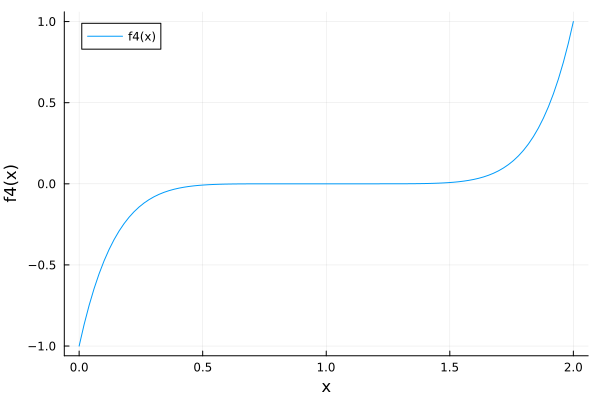

In [74]:
x = range(0, stop = 2, length = 100)
y = f4.(x)

plot(x, y, label = "f4(x)", xlabel = "x", ylabel = "f4(x)")

In [75]:
table = DataFrame(How=Function[],Iters=Float64[],Calls=Float64[])
roots_bisection(f4)
push!(table,(roots_bisection, tracker.steps, tracker.fncalls))
roots_derivative(f4)
push!(table,(roots_derivative,tracker.steps, tracker.fncalls))
roots_derivative_approx(f4)
push!(table,(roots_derivative_approx, tracker.steps, tracker.fncalls))

Row,How,Iters,Calls
,Function,Float64,Float64
1,roots_bisection,265.0,418.0
2,roots_derivative,298.0,484.0
3,roots_derivative_approx,333.0,547.0


#### Przykłady funkcji, dla których metody nie działają

##### Metoda wykorzystująca przedział i zmianę znaku - bisekcja

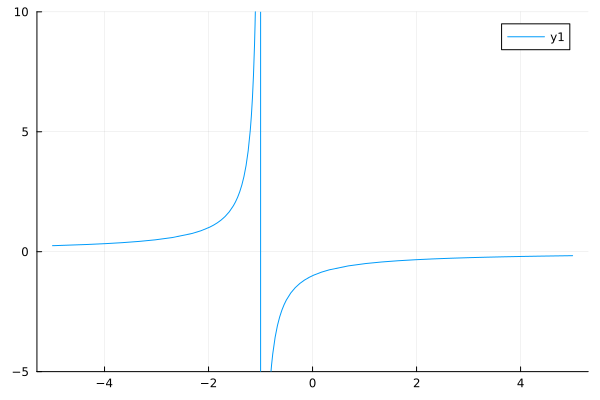

In [76]:
f(x) = (x)/(x+1) - 1
plot(f, ylim=(-5,10))

In [77]:
# funkcja nie jest ciągła w granicach przedziału
res = find_zero(f,(-2,0),Bisection())
println("Otrzymany wynik: ", f(res))

Otrzymany wynik: 4.503599627370496e15


##### Metoda wykorzystująca pochodną - Newton

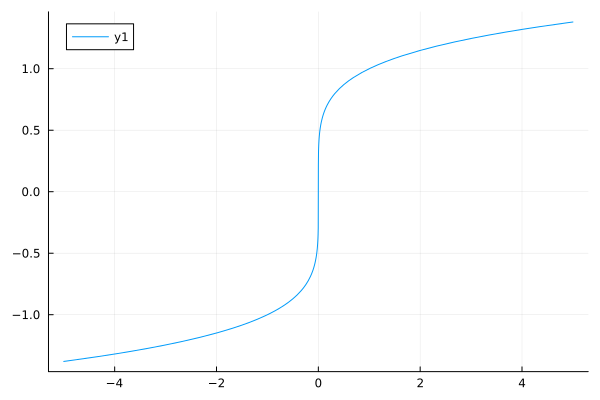

In [78]:
function f(x)
    if x < 0.0
        return -abs(x)^(1/5)
    elseif x == 0.0
        return 0.0
    else
        return abs(x)^(1/5)
    end
end
plot(f)

In [79]:
# pochodna w zerze bliska pionowej
res = roots_derivative(f) 

Roots.ConvergenceFailed: Roots.ConvergenceFailed("Algorithm failed to converge")

##### Metoda wykorzystująca przybliżenie pochodnej - Steffensen

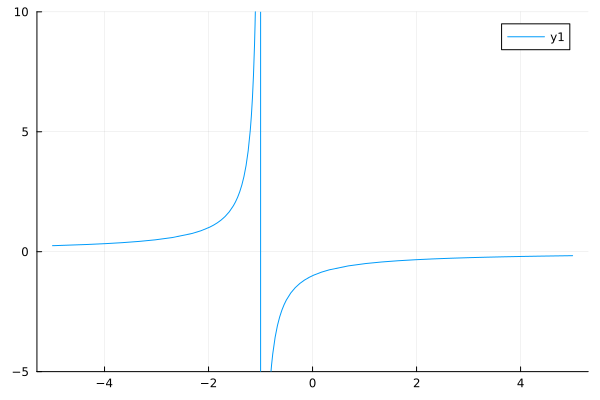

In [80]:
f(x) = (x)/(x+1) - 1
plot(f, ylim=(-5,10))

In [81]:
# jak przy bisekcji - funkcja nie jest ciągła
res = roots_derivative_approx(f)

451731.22814570036

#### Wstęga Newtona

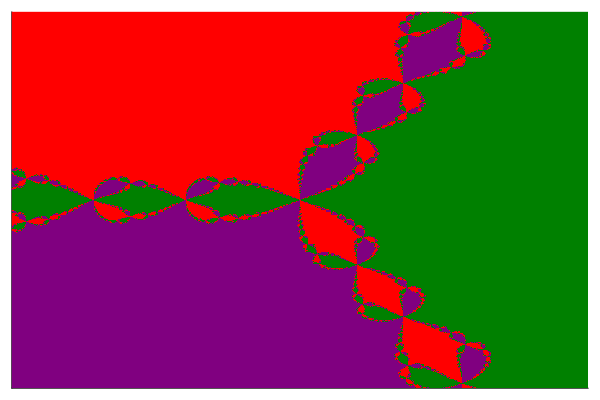

In [82]:
f(x) = x^3 - 1

# obliczenie pochodnej f i zbudowanie mapowania iteracyjnego dla metody Newtona, zwraca mapowanie jako wynik
function get_map(f)
    @variables x
    Dx = Differential(x)
    map = x - f(x) / Dx(f(x)) |> expand_derivatives
    update_expr = build_function(map, x)
    return eval(update_expr)
end

update = get_map(f)

# iteracyjna aktualizacja punktu x za pomocą funkcji update
function applyiteratively(x, update; n=100)
    for i in 1:n
        x = update(x)
    end
    return x
end

# granice obszaru i krok
lower = -2 - 2im
upper = 2 + 2im
step = 0.5e-2

# macierz Z0, która zawiera punkty zespolone na obszarze określonym przez lower, upper i step, macierz ta służy jako początkowe punkty iteracji metody Newtona
Z0 = [a+b*im for b in real(lower):step:real(upper),
                    a in imag(lower):step:imag(upper)]

Z100 = applyiteratively.(Z0, update)

# wykres typu heatmap, który przedstawia kąty liczby zespolonej w macierzy Z100, kąty są kodowane przez kolory
heatmap(angle.(Z100), colorbar=false, color=:rainbow, ticks=false)


W powyższym kodzie generowana jest wstęga Newtona na podstawie zastosowania metody Newtona do znalezienia pierwiastków funkcji f(x) = x^3 - 1.

Proces generowania wstęgi Newtona polega na iteracyjnym aktualizowaniu punktów w przestrzeni zespolonej za pomocą mapowania iteracyjnego, które jest zdefiniowane w funkcji get_map.

Każdy punkt z macierzy Z0 służy jako początkowy punkt iteracji. Następnie, dla każdego punktu, iteracyjnie stosowana jest funkcja update, która odnajduje kolejne przybliżenia pierwiastka funkcji f(x). Liczba iteracji jest kontrolowana przez parametr n w funkcji applyiteratively.

Wartości punktów po iteracjach są zapisywane w macierzy Z100. Wykres typu heatmap jest generowany na podstawie kątów liczby zespolonej w macierzy Z100. Kąty te są kodowane przez kolory przy użyciu palety barw rainbow.

Związek z metodą Newtona polega na iteracyjnym przybliżaniu pierwiastków funkcji f(x) poprzez stosowanie mapowania iteracyjnego, które jest zdefiniowane jako różnica między aktualnym punktem a wartością funkcji f(x) podzieloną przez pochodną funkcji f(x). Metoda Newtona polega na powtarzaniu tego procesu aż do zbliżenia się do rzeczywistego pierwiastka funkcji. W przypadku wstęgi Newtona, iteracje są przeprowadzane na siatce punktów w przestrzeni zespolonej, a kąty liczby zespolonej reprezentują stopień zbieżności do pierwiastków.

#####